In [15]:
import cv2
from scipy.signal import convolve2d
from scipy import ndimage
import matplotlib.pyplot as plt
import numpy as np

In [35]:
img = cv2.imread('vignettes/rgb/61/rgb_410_6830/rgb_61_414000_6830000.jpg')

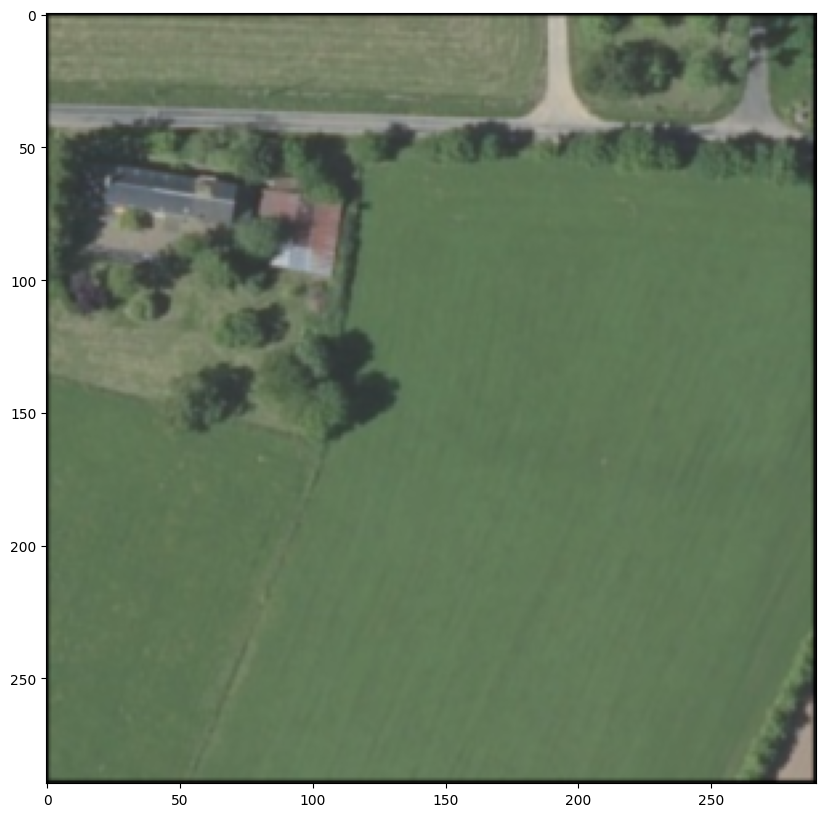

In [38]:
k = np.array([[0, 1, 0],
              [1, 2, 1],
              [0, 1, 0]])

convolved_r = convolve2d(img[:,:,0], (1/k.sum())*k, mode='full')
convolved_g = convolve2d(img[:,:,1], (1/k.sum())*k, mode='full')
convolved_b = convolve2d(img[:,:,2], (1/k.sum())*k, mode='full')

convolved_img = np.dstack([convolved_r, convolved_g, convolved_b])

plt.subplots(figsize=(10, 10))
plt.imshow(convolved_img/255)

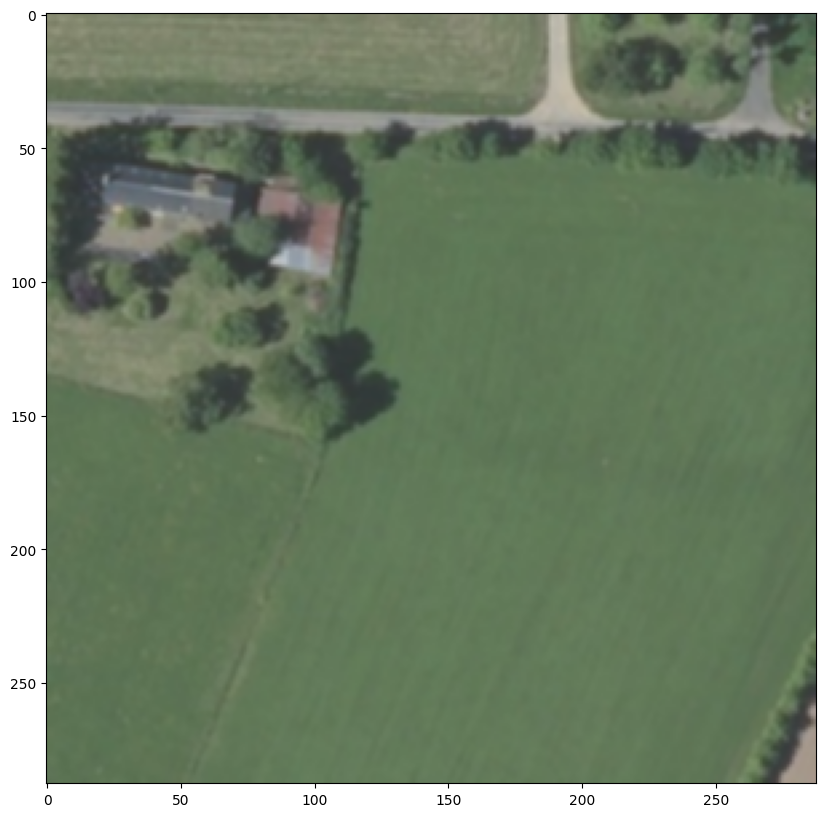

In [9]:
blurred_img = cv2. GaussianBlur(img, ksize=(3, 3), sigmaX=0, sigmaY=0)

plt.subplots(figsize=(10, 10))
plt.imshow(blurred_img)

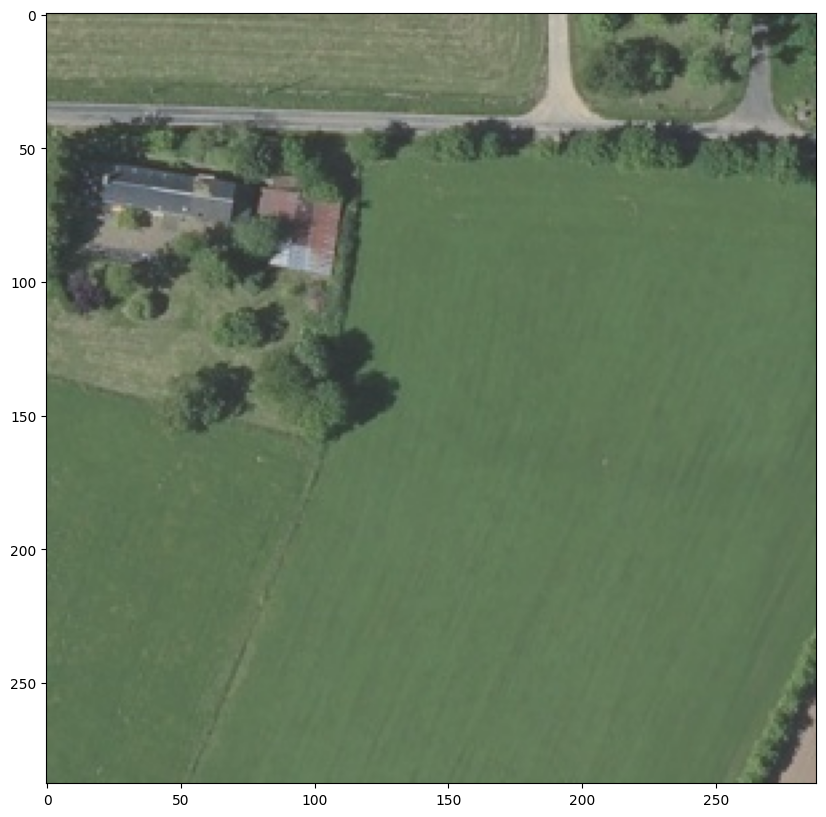

In [6]:
plt.subplots(figsize=(10, 10))
plt.imshow(img)

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('vignettes/stat_vignettes.csv', index_col="Unnamed: 0")

In [3]:
df

,dept,file,wood_size,w_mean_R,w_mean_G,w_mean_B,nw_mean_R,nw_mean_G,nw_mean_B,w_std_R,...,w_mean_texture_B,nw_mean_texture_R,nw_mean_texture_G,nw_mean_texture_B,w_std_texture_R,w_std_texture_G,w_std_texture_B,nw_std_texture_R,nw_std_texture_G,nw_std_texture_B
0,35,35_305000_6780000,22931,47.846278,62.230125,50.178405,91.561662,99.634696,72.828970,13.998765,...,2437.901574,4423.111126,4817.768533,3520.970240,547.792304,541.354222,316.789268,799.319034,623.937669,465.555891
1,35,35_305000_6780144,35180,47.710119,61.688744,49.311285,79.884139,96.788041,65.237166,15.098680,...,2402.407135,3846.576396,4663.908383,3143.367138,617.661794,613.195904,339.742779,785.993186,745.575531,419.502954
2,35,35_305000_6780288,4418,47.363739,61.398144,49.561793,94.968851,104.184843,77.726995,16.590633,...,2356.155048,4602.062260,5050.717699,3767.424802,732.922428,741.698692,475.072404,1219.912980,947.389199,939.160877
3,35,35_305000_6780432,65385,49.257123,59.940751,48.701430,78.249103,85.958938,65.340338,16.241676,...,2363.252275,3752.570989,4133.631756,3137.351330,586.802857,501.095862,287.222070,1307.413610,1082.094676,741.471717
4,35,35_305000_6780576,78512,46.428304,58.077530,46.867867,50.697202,55.811146,47.149594,14.276949,...,2269.160574,2440.912906,2713.701489,2288.087996,464.982133,470.615667,255.439973,737.163888,564.071857,311.810242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25195,14,14_409720_6930144,0,NaN,NaN,NaN,39.459286,74.036941,83.066876,NaN,...,NaN,1910.517144,3584.748409,4021.710226,NaN,NaN,NaN,137.860159,271.779140,258.720502
25196,14,14_409720_6930288,0,NaN,NaN,NaN,36.010320,75.265866,80.904851,NaN,...,NaN,1741.794729,3642.217496,3916.030141,NaN,NaN,NaN,204.145408,311.818049,264.411927
25197,14,14_409720_6930432,0,NaN,NaN,NaN,42.008174,85.355191,84.712312,NaN,...,NaN,2033.970257,4132.791944,4101.640179,NaN,NaN,NaN,285.717570,434.311491,305.099164
25198,14,14_409720_6930576,0,NaN,NaN,NaN,46.196470,90.219715,86.888383,NaN,...,NaN,2237.580319,4370.102503,4207.698592,NaN,NaN,NaN,339.825630,498.064111,336.809950


In [4]:
from sklearn.cluster import KMeans, AgglomerativeClustering
import numpy as np

In [5]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt

In [6]:
X = df.drop(["dept", 'file'], axis=1)

In [7]:
X = normalize(X.replace(np.nan, 0))

In [8]:
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init="auto")

In [9]:
kmeans.fit(X)
kmeans.labels_

C:\Users\adelabrosse\.conda\envs\inrae_seg_env\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\adelabrosse\.conda\envs\inrae_seg_env\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


array([3, 8, 9, ..., 7, 7, 0])

In [10]:
df

,dept,file,wood_size,w_mean_R,w_mean_G,w_mean_B,nw_mean_R,nw_mean_G,nw_mean_B,w_std_R,...,w_mean_texture_B,nw_mean_texture_R,nw_mean_texture_G,nw_mean_texture_B,w_std_texture_R,w_std_texture_G,w_std_texture_B,nw_std_texture_R,nw_std_texture_G,nw_std_texture_B
0,35,35_305000_6780000,22931,47.846278,62.230125,50.178405,91.561662,99.634696,72.828970,13.998765,...,2437.901574,4423.111126,4817.768533,3520.970240,547.792304,541.354222,316.789268,799.319034,623.937669,465.555891
1,35,35_305000_6780144,35180,47.710119,61.688744,49.311285,79.884139,96.788041,65.237166,15.098680,...,2402.407135,3846.576396,4663.908383,3143.367138,617.661794,613.195904,339.742779,785.993186,745.575531,419.502954
2,35,35_305000_6780288,4418,47.363739,61.398144,49.561793,94.968851,104.184843,77.726995,16.590633,...,2356.155048,4602.062260,5050.717699,3767.424802,732.922428,741.698692,475.072404,1219.912980,947.389199,939.160877
3,35,35_305000_6780432,65385,49.257123,59.940751,48.701430,78.249103,85.958938,65.340338,16.241676,...,2363.252275,3752.570989,4133.631756,3137.351330,586.802857,501.095862,287.222070,1307.413610,1082.094676,741.471717
4,35,35_305000_6780576,78512,46.428304,58.077530,46.867867,50.697202,55.811146,47.149594,14.276949,...,2269.160574,2440.912906,2713.701489,2288.087996,464.982133,470.615667,255.439973,737.163888,564.071857,311.810242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25195,14,14_409720_6930144,0,NaN,NaN,NaN,39.459286,74.036941,83.066876,NaN,...,NaN,1910.517144,3584.748409,4021.710226,NaN,NaN,NaN,137.860159,271.779140,258.720502
25196,14,14_409720_6930288,0,NaN,NaN,NaN,36.010320,75.265866,80.904851,NaN,...,NaN,1741.794729,3642.217496,3916.030141,NaN,NaN,NaN,204.145408,311.818049,264.411927
25197,14,14_409720_6930432,0,NaN,NaN,NaN,42.008174,85.355191,84.712312,NaN,...,NaN,2033.970257,4132.791944,4101.640179,NaN,NaN,NaN,285.717570,434.311491,305.099164
25198,14,14_409720_6930576,0,NaN,NaN,NaN,46.196470,90.219715,86.888383,NaN,...,NaN,2237.580319,4370.102503,4207.698592,NaN,NaN,NaN,339.825630,498.064111,336.809950


In [11]:
X_copy = X.copy()
pca = PCA(n_components=2)
X_copy = pca.fit_transform(X_copy)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.79600584 0.15092073]
[69.12609463 30.09943524]


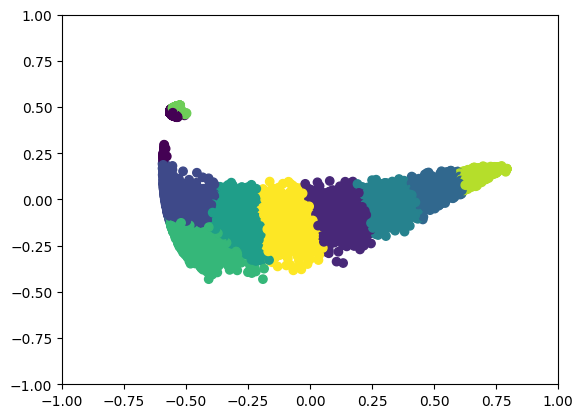

In [12]:
plt.xlim([-1, 1])
plt.ylim([-1, 1])

plt.scatter(X_copy.T[0], X_copy.T[1], c=kmeans.labels_)

In [13]:
clustered_df = pd.DataFrame(X_copy)
clustered_df['cluster'] = kmeans.labels_

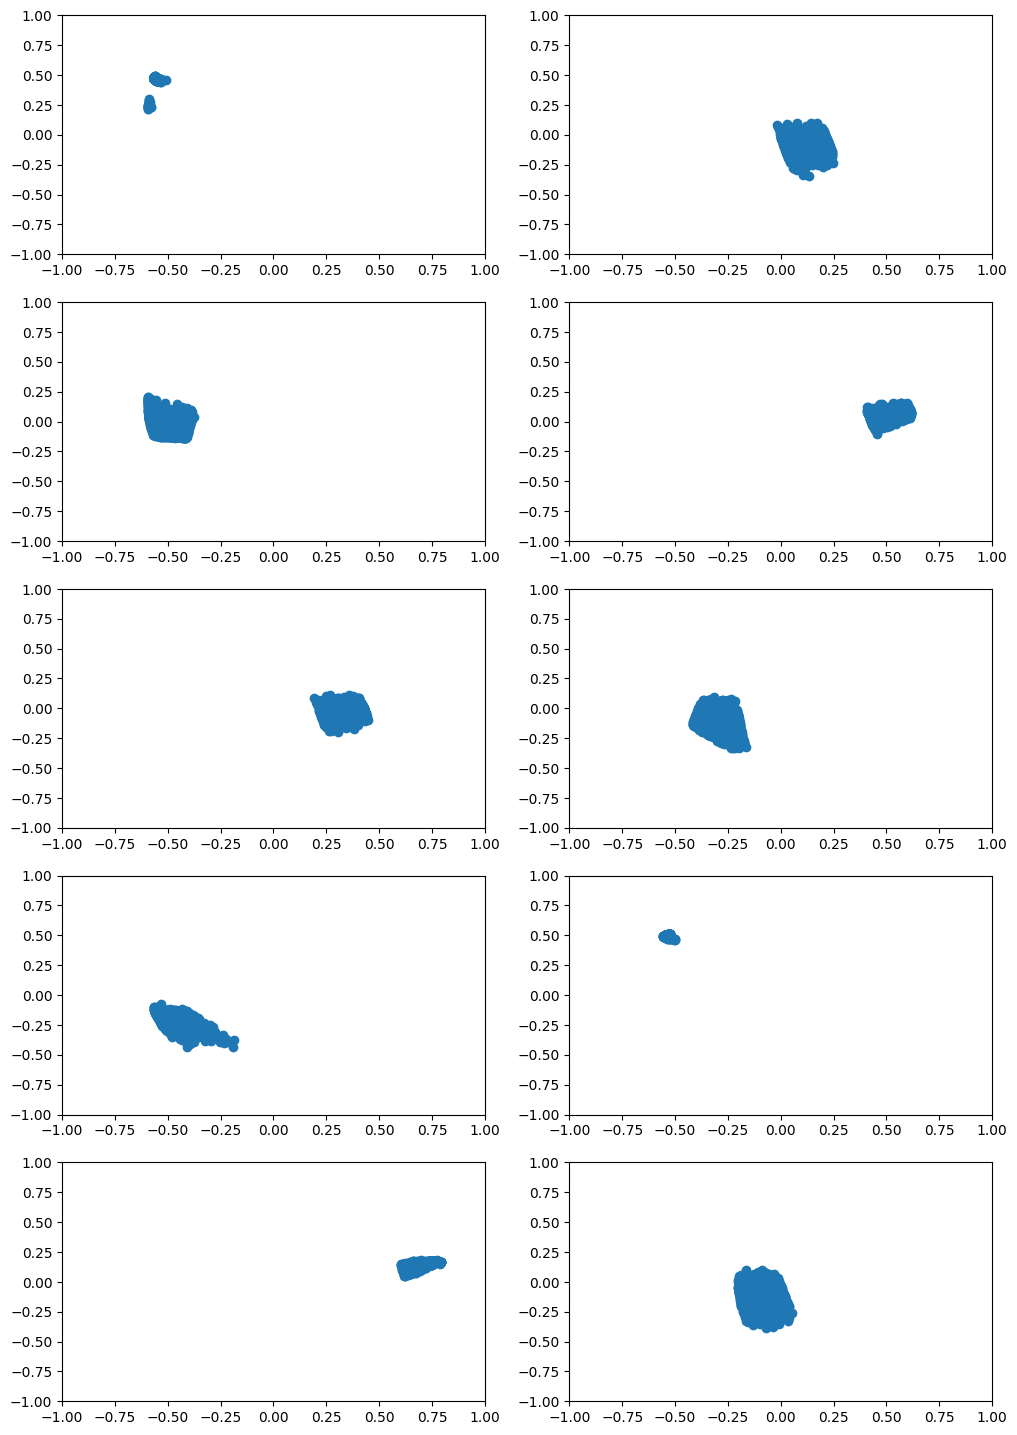

In [14]:
# define subplot grid
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(12, 18))
#plt.subplots_adjust(vspace=0.5)
# fig.suptitle("Daily closing prices", fontsize=18, y=0.95)

# loop through tickers and axes
for cluster, ax in zip(range(n_clusters), axs.ravel()):
    # filter df for ticker and plot on specified axes
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.scatter(clustered_df[clustered_df['cluster'] == cluster].loc[:,0], clustered_df[clustered_df['cluster'] == cluster].loc[:,1])

    # chart formatting
    # ax.set_title(ticker.upper())
    # ax.get_legend().remove()
    # ax.set_xlabel("")

plt.show()


In [15]:
clustered_df['file'] = df['file']

In [16]:
clustered_df[clustered_df['cluster'] == 1]# .file.tolist()

,0,1,cluster,file
13,0.173521,0.076755,1,35_305288_6780144
14,0.071668,0.038244,1,35_305288_6780288
24,0.172333,0.096979,1,35_305576_6780000
106,0.081737,-0.098115,1,35_307720_6780576
107,0.093399,-0.118104,1,35_307720_6780720
...,...,...,...,...
25073,0.090739,-0.163665,1,14_406288_6929720
25097,0.054673,-0.198592,1,14_407000_6929720
25102,0.078040,-0.164348,1,14_407144_6929576
25113,0.209738,-0.155837,1,14_407432_6929432
